In [1]:
from scipy.constants import k, e, hbar, eV
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
from utils import *

# 2D ballistic FET
## Enunciado

Temperaturas $T=1$ K y $T=298$ K.

Plotear con rango $V_{DS}\in [0, 0.5]$ eV,

para $V_{GS}=0.3, 0.35, 0.4, 0.45, 0.5$ eV,

Tomar $E_{C1}=-4.7$ eV, $E_{F}=-5.0$ eV,

$L=40$ nm, $W=3L$, $C_{G}=0.1$ fF, $C_{D}=C_{S}=0$,

masa efectiva $m=0.5m_{0}$, donde $m_{0}=9.1\times 10^{-31}$ kg.

## Variables a ocupar

$A = W \cdot L$ m $^{2}$

$\mu_s=E_F$

$\mu_d=E_F + qV_{DS}$


In [3]:
# Define Constants
Length = 40 * 1e-9                          # m
Width = 3 * 40 * 1e-9                       # m
A = Length * Width                          # m^2
mu_s = 0.5                                  
mu_d = 0.5
tau_d = 0.5
tau_s = 0.5
# T = 1
N0 = 1
C_es = 1
A = 1.
m = 1.
infty = 1.
beta = lambda T: 1/(k*T) * eV

def f(E, mu, T):
    return 1 / (1 + np.exp(np.clip((E - mu) * beta(T), -100, 1e2)))

E_array = np.linspace(-20, 20, 1000)

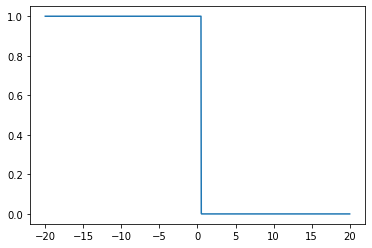

In [4]:
plt.plot(E_array, f(E_array, mu_s, 1))

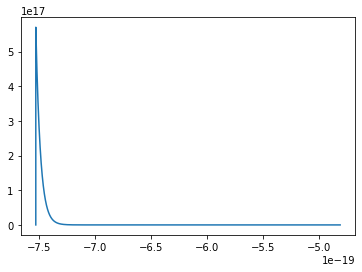

In [22]:
E_plot = np.linspace(E_C, -3*eV, 100000, dtype=np.longdouble)
T = 300
integrand = g(E_plot-E_C) * f(E_plot - E_F, T)
plt.plot(E_plot, integrand)

In [23]:
N0 = np.trapz(integrand, x=E_plot)
print(N0)

0.002361739577826822


c:\Users\benja\Uchile\2022-2\IND\ballistic-FET\utils.py:45: RuntimeWarning: overflow encountered in exp
  neg_exp = np.exp(-E * beta(T))
c:\Users\benja\Uchile\2022-2\IND\ballistic-FET\utils.py:46: RuntimeWarning: invalid value encountered in true_divide
  return neg_exp / (1 + neg_exp)


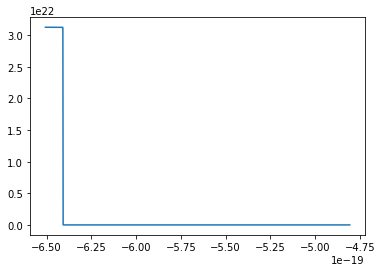

In [18]:
integrand2 = 1/2*(g(E_plot-E_C) * f(E_plot - mu_s, T) + g(E_plot-E_C) * f(E_plot - mu_d(1), T))
plt.plot(E_plot, integrand2)

In [21]:
integrand2

array([nan, nan, nan, ...,  0.,  0.,  0.])

In [20]:
N = np.trapz(integrand2, x=E_plot)
print(N)

nan


In [11]:
N - N0

3505.2859920317114

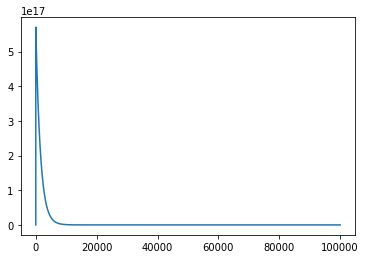

In [7]:
plt.plot(g(E_plot-E_C) * f(E_plot - mu_d(0), 300))

In [37]:
mu_d(0)

-1.2834849832677848e-37